# Plotting examples

## Stacked plots

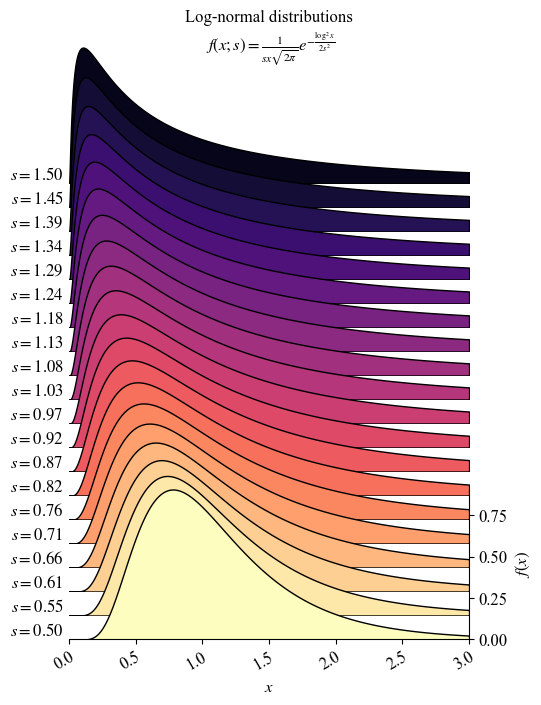

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
from scipy.stats import lognorm
from matplotlib import rcParams
from aerosol.plotting import stacked_plots,rotate_xticks

rcParams.update({'font.size': 12, 
                 "font.family": "times new roman",
                 "mathtext.fontset" : "stix"
                })

# Generate data
s = np.linspace(0.5,1.5,20)
x = np.linspace(0,3.0,10000)
ylist=[]
ylabel=[]
for i in range(20):
    ylist.append(lognorm.pdf(x, s[i]))
    ylabel.append("$s = %.2f$"% s[i])
df=pd.DataFrame(
    columns = ylabel, 
    index = x, 
    data = np.stack(ylist).T )

# Plot 
fig,axx,axy = stacked_plots(
    df,
    height_coef=5,
    spacing_coef=0.8,
    plot_type="fill_between",
    cmap=cm.magma_r,
    edgecolor='black',
    linewidth=1)

rotate_xticks(axx,30)
axx.set_xlabel("$x$")
axy.set_ylabel("$f(x)$")
fig.set_figheight(6)
fig.set_figwidth(4)
fig.suptitle("Log-normal distributions\n $f(x;s) = \
    \\frac{1}{sx\\sqrt{2\\pi}}e^{-\\frac{\\log^2 x}{2s^2}}$",
    y=1.05,fontsize=12)

plt.show()

## Aerosol size distribution subplots

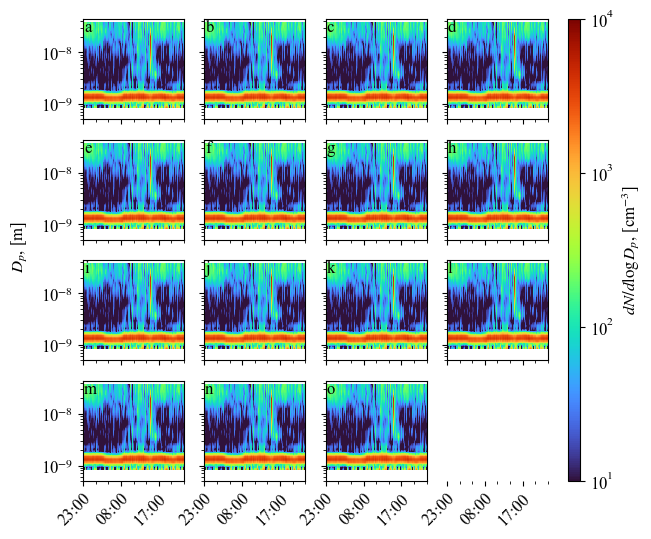

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib.pyplot import cm
from matplotlib import colors
import matplotlib.pyplot as plt
from scipy.stats import lognorm
from matplotlib import rcParams
from aerosol.plotting import subplot_aerosol_dist

rcParams.update({'font.size': 12, 
                 "font.family": "times new roman",
                 "mathtext.fontset" : "stix"
                })

# Load data
ds = xr.open_dataset("NAIS_20220209.nc")
ds.close()
v = [ds.pos_ions.to_pandas()]*15

# Plot
fig,ax,cax = subplot_aerosol_dist(
    v,
    (4,4),
    cmap=cm.turbo,
    norm=colors.SymLogNorm(1,vmin=10,vmax=10000),
    xminortick_interval="3H",
    xmajortick_interval="9H",
    xticklabel_format="%H:%M",
    keep_inner_ticklabels = False,
    label_subplots = True,
    label_color = "black"
)

# Add y-axis label
fig.text(0.02, 0.5, '$D_p$, [m]', ha='center', va='center', rotation='vertical')
cax.set_label("$dN/d\\log D_p$, [cm$^{-3}$]")
fig.set_figheight(6)
fig.set_figwidth(6)

plt.show()